In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation

In [2]:
df=pd.read_csv('mnist_train.csv')
df.shape

(60000, 785)

In [3]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [6]:
x=data[:,1:]
y=data[:,0]

split=int(0.8*x.shape[0])

x_train=x[:split,:]
y_train=y[:split,]

x_test=x[split:,:]
y_test=y[split:]

print(x.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)



(60000, 784)
(48000, 784) (48000,)
(12000, 784) (12000,)


# KNN



In [7]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [8]:
def knn(x,y,query_pt,k=10):
    vals=[]
    
    m=x.shape[0]
    
    for i in range(m):
        d=dist(query_pt,x[i])
        vals.append((d,y[i]))
        
    vals=sorted(vals)
        
        #nearest/first k points
    vals=vals[:k]
    vals=np.array(vals)
        
#     print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
#     print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred
        
        
        
        
    

In [9]:
pred=knn(x_train,y_train,x_test[149])
print(int(pred))

8


9


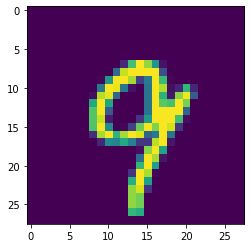

In [10]:

n=x_test[148].reshape((28,28))
print(y_test[14])
plt.imshow(n)
plt.show()

# accuracy


In [11]:
count=0
for i in range(x_test.shape[0]):
    pred=knn(x_train,y_train,x_test[i])
    if pred==y_test[i]:
        count+=1
print(count)

KeyboardInterrupt: 